In [1]:
import numpy as np
import joblib
import os
from motion_code import MotionCode
from data_processing import process_ppmi_data_for_motion_codes

In [2]:
labels = joblib.load('../notebooks/artifacts/labels.pkl')
time_series = joblib.load('../notebooks/artifacts/time_series.pkl')

In [3]:
def train_test_split(x, split=0.2):
    sp_idx = int(len(x)*split)
    test_x, train_x = x[:sp_idx], x[sp_idx:]
    return train_x, test_x

def pad_zeros(x):
    maxlen = max([len(item) for item in x])
    new_x = np.zeros((len(x), maxlen))
    for i, item in enumerate(x):
        new_x[i, :len(item)] = item
    return new_x

In [4]:
time_series = pad_zeros(time_series)
Y_train, Y_test = train_test_split(time_series)
labels_train, labels_test = train_test_split(labels)

In [5]:
X_train, Y_train, labels_train = process_ppmi_data_for_motion_codes(Y_train, labels_train)
X_test, Y_test, labels_test = process_ppmi_data_for_motion_codes(Y_test, labels_test)

print(X_train.shape, Y_train.shape, labels_train.shape)
print(X_test.shape, Y_test.shape, labels_test.shape)

(216, 256) (216, 256) (216,)
(53, 256) (53, 256) (53,)


In [6]:
model = MotionCode(m=20, Q=1, latent_dim=2, sigma_y=0.1)
# Then we train model on the given X_train, Y_train, label_train set and saved it to a file named test_model.
model_path = 'saved_models/' + 'test_model_ppmi'
os.makedirs(model_path, exist_ok=True)
# model.fit(X_train, Y_train, labels_train, model_path)

In [7]:
# Next we load the model and perform classification on 10 random test time series.
model.load(model_path)
num_test = labels_test.shape[0]
random_indices = np.random.choice(np.arange(num_test), size=10, replace=False)
predicted_labels = []
for ind in random_indices:
    predicted_labels.append(model.classify_predict(X_test[ind], Y_test[ind]))
print('True label:', list(labels_test[random_indices]))
print('Predicted label:', predicted_labels)

True label: [1, 2, 1, 0, 2, 1, 2, 0, 0, 0]
Predicted label: [1, 2, 1, 0, 2, 1, 1, 0, 0, 0]


In [8]:
# Now we can go on to perform prediction on the whole test set and get accuracy
acc = model.classify_predict_on_batches(X_test_list=X_test, Y_test_list=Y_test, true_labels=labels_test)
print('Accurary:', acc)

Accurary: 0.8113207547169812


In [9]:
from visualize import visualize_data_by_GP

In [10]:
data = (X_train, Y_train, labels_train, X_test, Y_test, labels_test)

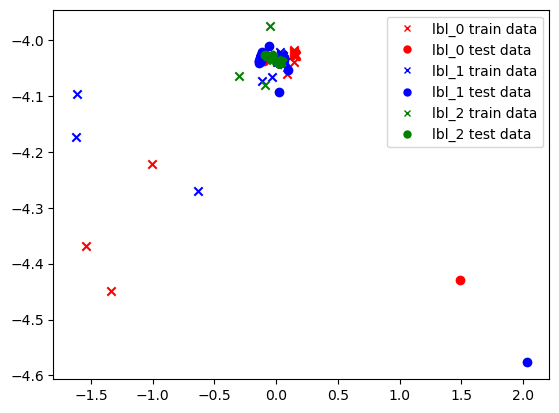

In [13]:
# visualize inducing points for each train sample
visualize_data_by_GP(data, num_motion=model.num_motion, m=10, Q=1, 
                     label_names=[f'lbl_{m}' for m in range(model.num_motion)], 
                     plot_path='out/gp_ppmi_cluster_visual.png')